# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [2]:
f_1 = lambda x: np.sign(x)*x + x**2
f_2 = lambda x: np.sign(x)*(x**2)
f_3 = lambda x: (np.abs(np.sin(5*x)))**3
f_4 = lambda x: 1/(1 + x**2)
f_5 = lambda x: 1/(1 + 25*(x**2))
f_6 = lambda x: 1/(1 + 100*(x**2))
f_7 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

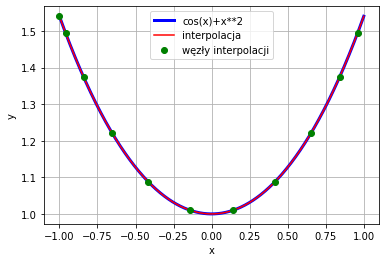

In [3]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 11
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

Wykres funkcji $f(x) = \mathrm{sgn}(x)x+x^2$:

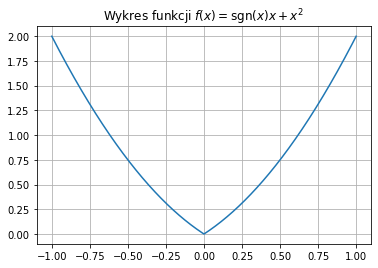

In [4]:
y_precise = f_1(x)
plt.plot(x,y_precise)
plt.title('Wykres funkcji $f(x) = \mathrm{sgn}(x)x+x^2$')
plt.grid()
plt.show()

Interpolacja funkcji $f(x) = \mathrm{sgn}(x)x+x^2$ rzędu 10, 100, 1000, 10000 i 100000, wykonana z użyciem funkcji *barycentric_interpolate*, z pakietu Scipy:

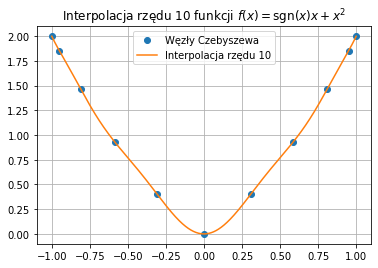

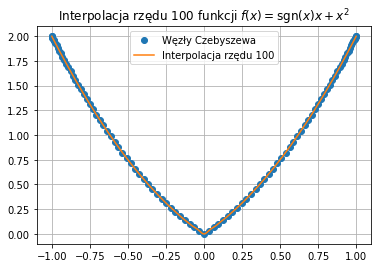

c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:547: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:547: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:642: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


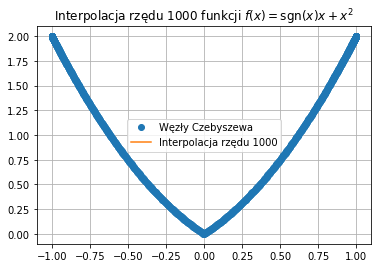

c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:547: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


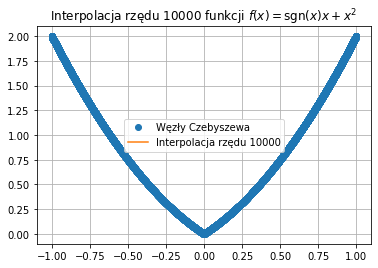

c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:547: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


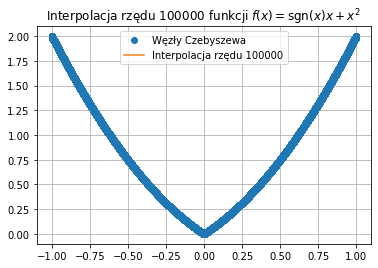

In [5]:
q_interpolate = []
for rg in [10,100,1000,10000,100000]:
    xi = main.chebyshev_nodes(rg)
    yi = f_1(xi)
    y = barycentric_interpolate(xi, yi, x)
    q_interpolate.append(main.L_inf(y_precise,y))
    plt.plot(xi, yi, 'o')
    plt.plot(x, y)
    plt.title('Interpolacja rzędu {0} funkcji '.format(rg) + '$f(x) = \mathrm{sgn}(x)x+x^2$')
    plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu {0}'.format(rg)])
    plt.grid()
    plt.show()

Interpolacja funkcji $f(x) = \mathrm{sgn}(x)x+x^2$ rzędu 10, 100, 1000, 10000 i 100000, wykonana z użyciem funkcji *barycentric_inte*, zaimplementowanej zgodnie z wzorem podanym na wykładzie:

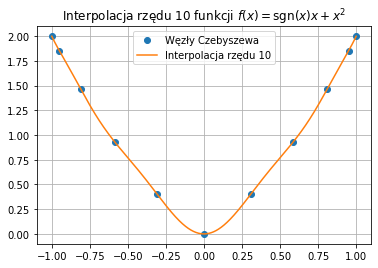

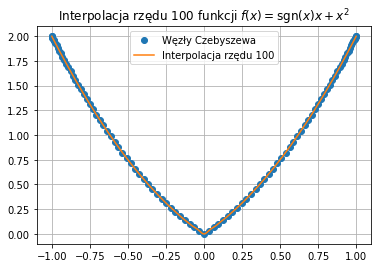

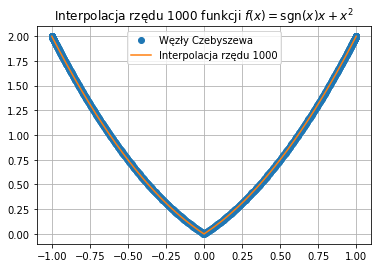

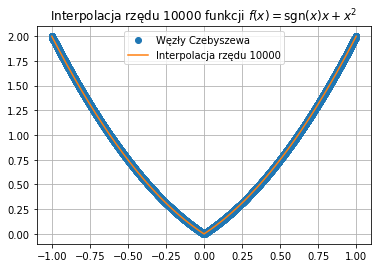

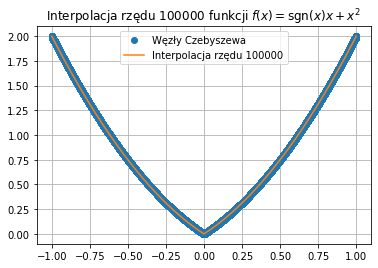

In [6]:
q_inte = []
for rg in [10,100,1000,10000,100000]:
    xi = main.chebyshev_nodes(rg)
    yi = f_1(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi, yi, wi, x)
    q_inte.append(main.L_inf(y_precise,y))
    plt.plot(xi, yi, 'o')
    plt.plot(x, y)
    plt.title('Interpolacja rzędu {0} funkcji '.format(rg) + '$f(x) = \mathrm{sgn}(x)x+x^2$')
    plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu {0}'.format(rg)])
    plt.grid()
    plt.show()

Z uwagi na fakt, że funkcja z pakiety Scipy wyświetla ostrzeżenia przy rzędzie interpolacji większym niż 10 pomimo poprawnych danych wejściowych, w dalszej cząści sprawozdania będę korzystac jedynie z napisanej przez mnie funkcji *barycentric_inte*.

Ocena czasowa algorytmu *barycentric_inte* w zależności od rzędu interpolacji:

In [7]:
%%capture
time_avarage = []
time_stdev = []
n = np.arange(10,501,10).tolist()
for rg in n:
    xi = main.chebyshev_nodes(rg)
    yi = f_1(xi)
    wi = main.bar_czeb_weights(rg)
    t = %timeit -o main.barycentric_inte(xi, yi, wi, x)
    time_avarage.append(t.average)
    time_stdev.append(t.stdev)

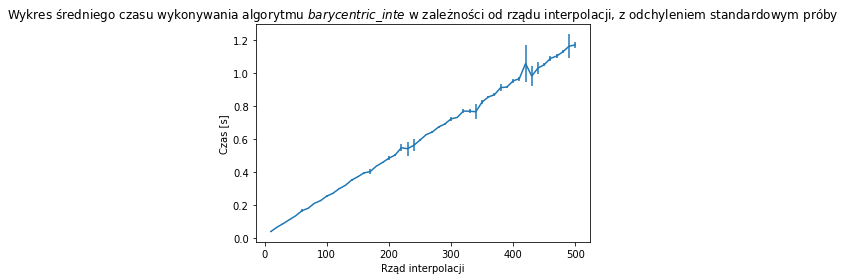

In [8]:
fig, ax = plt.subplots(1,1)
ax.errorbar(n,time_avarage, yerr = time_stdev)
ax.set_title('Wykres średniego czasu wykonywania algorytmu $barycentric$_$inte$ w zależności od rządu interpolacji, '+
             'z odchyleniem standardowym próby')
ax.set_xlabel('Rząd interpolacji')
ax.set_ylabel('Czas [s]')
plt.show()

Na podstawie powyższego wykresu widać, że funkcja *barycentric_inte* charakteryzuje się liniową złożonością czasową O(n).


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

Norma błędu dla interpolacji przeprowadzonej z użyciem funkcji barycentric_inte dla rzędu 10, 100, 1000, 10000 i 100000:
[0.059219624368103185, 0.005965418924417049, 0.0005739642836657881, 8.303505128187411e-06, 6.550513119126314e-08]


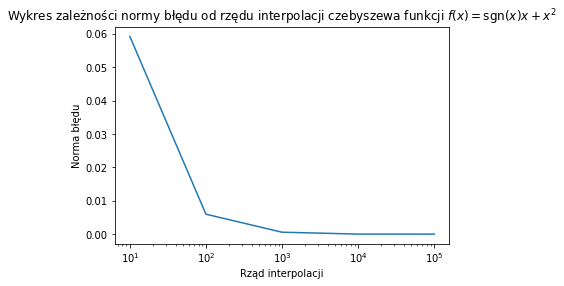

In [9]:
print('Norma błędu dla interpolacji przeprowadzonej z użyciem funkcji barycentric_inte dla rzędu 10, 100, 1000,' +
      ' 10000 i 100000:')
print(q_inte)
plt.semilogx([10,100,1000,10000,100000],q_inte)
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.title('Wykres zależności normy błędu od rzędu interpolacji czebyszewa funkcji $f(x) = \mathrm{sgn}(x)x+x^2$')
plt.show()

Z powyższego wykresu wynika, że dokładność (mniejszy błąd interpolacji) zwiększa się wraz wzrostem rzędu interpolacji.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

Z uwagi na duży czas obliczeń dla rzędu interpolacji większego od 100000, maksymalny rząd przyjmuję jako 100000 mimo tego, że błąd nie jest wówczas jeszcze na poziomie zera maszynowego. W poniższych wykresach dokonano również lepszego szacowania niż $n^{-v}$, wzorując się na szacowaniu dla funkcji różniczkowalnych z wykładu.

In [10]:
V=2.102e4
bound = lambda n,v:4*V/v/np.pi/(n-v)**v
y_precise = f_2(x)
q_f_2 = []
er_f_2 = []
r = [10,100,1000,10000,100000]
for rg in r:
    xi = main.chebyshev_nodes(rg)
    yi = f_2(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi, yi, wi, x)
    q_f_2.append(main.L_inf(y_precise,y))
    er_f_2.append(bound(rg,1))

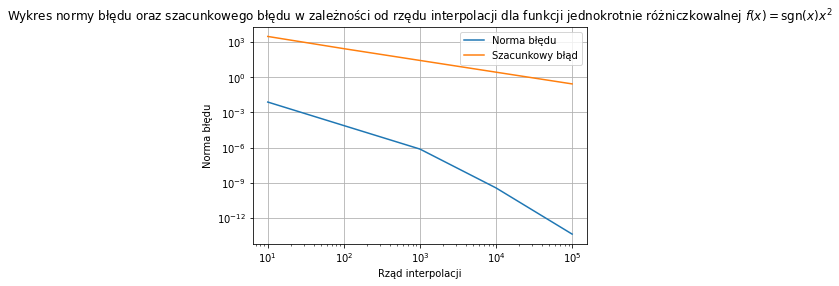

In [11]:
plt.loglog(r, q_f_2)
plt.loglog(r, er_f_2)
plt.title('Wykres normy błędu oraz szacunkowego błędu w zależności od rzędu interpolacji dla funkcji ' +
          'jednokrotnie różniczkowalnej $f(x) = \mathrm{sgn}(x)x^{2}$')
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.legend(['Norma błędu', 'Szacunkowy błąd'])
plt.grid()
plt.show()

In [12]:
y_precise = f_3(x)
q_f_3 = []
er_f_3 = []
r = [10,100,1000,10000,100000]
for rg in r:
    xi = main.chebyshev_nodes(rg)
    yi = f_3(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi, yi, wi, x)
    q_f_3.append(main.L_inf(y_precise,y))
    er_f_3.append(bound(rg,3))

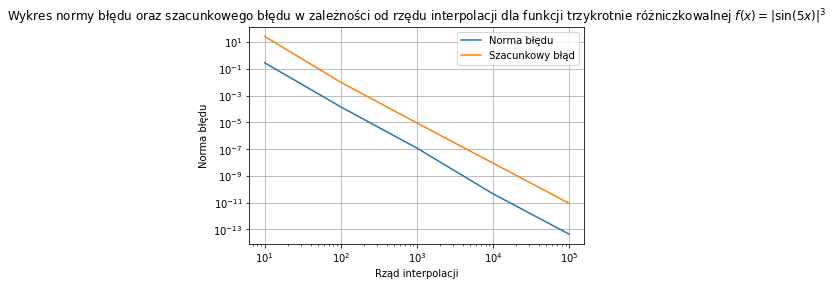

In [13]:
plt.loglog(r, q_f_3)
plt.loglog(r, er_f_3)
plt.title('Wykres normy błędu oraz szacunkowego błędu w zależności od rzędu interpolacji dla funkcji ' +
          'trzykrotnie różniczkowalnej $f(x)=|\sin(5 x)|^3$')
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.legend(['Norma błędu', 'Szacunkowy błąd'])
plt.grid()
plt.show()

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

Dla $a = 1:$

c jest z definicji równe 1, c = 1
Wartość b odczytuję z wykresu i odejmuję małą liczbę aby pozbyć się dzielenia przez 0, b =  0.999999999999999
Wartość a wyliczam z wzoru, a =  1.4142135623730943


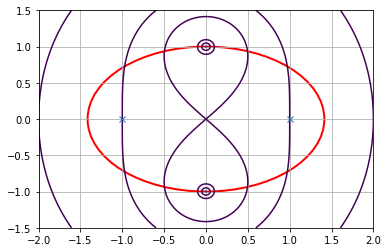

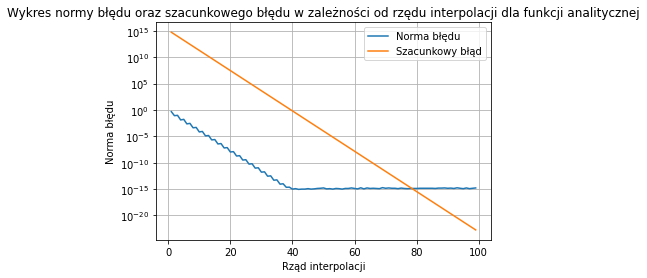

In [85]:
from matplotlib.patches import Ellipse
x = np.linspace(-2,2,2000)
y = np.linspace(-1.5,1.5,2000)
X, Y = np.meshgrid(x, y)
Z = 1/np.abs((1+1*(X+1j*Y)**2))
elipsa_f_rungego=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
ax.grid()
c=1
b=1 - 1e-15
a=np.sqrt(1+b**2)
print('c jest z definicji równe 1, c = 1')
print('Wartość b odczytuję z wykresu i odejmuję małą liczbę aby pozbyć się dzielenia przez 0, b = ', b)
print('Wartość a wyliczam z wzoru, a = ', a)
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x')
rho = a+b
M = f_4(1j*b)
x = np.linspace(-1,1,1000)
er_f_4 = []
r = []
y_precise = f_4(x)
for rg in range(1, 100):
    xi = main.chebyshev_nodes(rg)
    yi = f_4(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi,yi,wi,x)
    er_f_4.append(main.L_inf(y, y_precise))
    r.append(rg)
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in r]
runge_zbieznosc=plt.figure()
ax=plt.gca()
ax.semilogy(r,er_f_4,label='Norma błędu')
ax.semilogy(r,oszacowanie,label='Szacunkowy błąd')
ax.set_xlabel('Rząd interpolacji')
ax.set_ylabel('Norma błędu')
ax.set_title('Wykres normy błędu oraz szacunkowego błędu w zależności od rzędu interpolacji dla funkcji analitycznej')
ax.grid()
ax.legend()
plt.show()

Dla $a = 25$:

c jest z definicji równe 1, c = 1
Wartość b odczytuję z wykresu i odejmuję małą liczbę aby pozbyć się dzielenia przez 0, b =  0.199999999999999
Wartość a wyliczam z wzoru, a =  1.0198039027185568


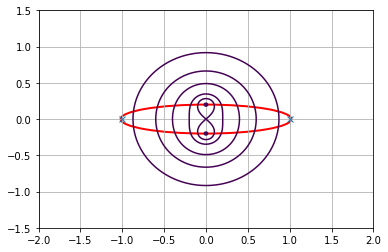

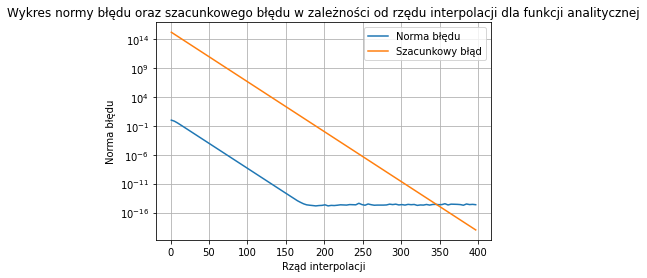

In [86]:
x = np.linspace(-2,2,2000)
y = np.linspace(-1.5,1.5,2000)
X, Y = np.meshgrid(x, y)
Z = 1/np.abs((1+25*(X+1j*Y)**2))
elipsa_f_rungego=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
ax.grid()
c=1
b=0.2 - 1e-15
a=np.sqrt(1+b**2)
print('c jest z definicji równe 1, c = 1')
print('Wartość b odczytuję z wykresu i odejmuję małą liczbę aby pozbyć się dzielenia przez 0, b = ', b)
print('Wartość a wyliczam z wzoru, a = ', a)
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x')
rho = a+b
M = f_5(1j*b)
x = np.linspace(-1,1,1000)
er_f_5 = []
r = []
y_precise = f_5(x)
for rg in range(1, 400,4):
    xi = main.chebyshev_nodes(rg)
    yi = f_5(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi,yi,wi,x)
    er_f_5.append(main.L_inf(y, y_precise))
    r.append(rg)
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in r]
runge_zbieznosc=plt.figure()
ax=plt.gca()
ax.semilogy(r,er_f_5,label='Norma błędu')
ax.semilogy(r,oszacowanie,label='Szacunkowy błąd')
ax.set_xlabel('Rząd interpolacji')
ax.set_ylabel('Norma błędu')
ax.set_title('Wykres normy błędu oraz szacunkowego błędu w zależności od rzędu interpolacji dla funkcji analitycznej')
ax.grid()
ax.legend()
plt.show()

Dla $a = 100$:

c jest z definicji równe 1, c = 1
Wartość b odczytuję z wykresu i odejmuję małą liczbę aby pozbyć się dzielenia przez 0, b =  0.099999999999999
Wartość a wyliczam z wzoru, a =  1.004987562112089


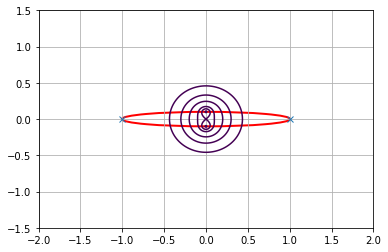

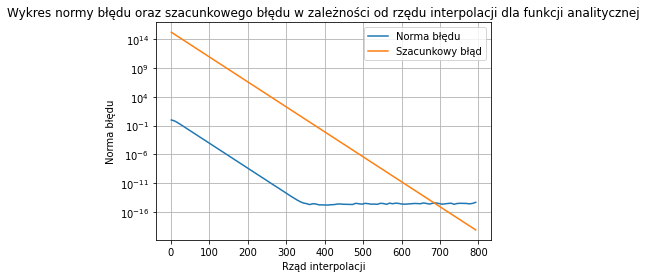

In [87]:
x = np.linspace(-2,2,2000)
y = np.linspace(-1.5,1.5,2000)
X, Y = np.meshgrid(x, y)
Z = 1/np.abs((1+100*(X+1j*Y)**2))
elipsa_f_rungego=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
ax.grid()
c=1
b=0.1 - 1e-15
a=np.sqrt(1+b**2)
print('c jest z definicji równe 1, c = 1')
print('Wartość b odczytuję z wykresu i odejmuję małą liczbę aby pozbyć się dzielenia przez 0, b = ', b)
print('Wartość a wyliczam z wzoru, a = ', a)
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x')
rho = a+b
M = f_6(1j*b)
x = np.linspace(-1,1,1000)
er_f_6 = []
r = []
y_precise = f_6(x)
for rg in range(1, 800,8):
    xi = main.chebyshev_nodes(rg)
    yi = f_6(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi,yi,wi,x)
    er_f_6.append(main.L_inf(y, y_precise))
    r.append(rg)
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in r]
runge_zbieznosc=plt.figure()
ax=plt.gca()
ax.semilogy(r,er_f_6,label='Norma błędu')
ax.semilogy(r,oszacowanie,label='Szacunkowy błąd')
ax.set_xlabel('Rząd interpolacji')
ax.set_ylabel('Norma błędu')
ax.set_title('Wykres normy błędu oraz szacunkowego błędu w zależności od rzędu interpolacji dla funkcji analitycznej')
ax.grid()
ax.legend()
plt.show()

Na powyższych wykresach można zaobserwować, że istnieje granica błędu, której nie można przekroczyć mimo dalszego zwiększania rzędu interpolacji. Jest to spowodowane reprezentacją liczb w komputerze co powoduje, że najmniejsze błąd będzie zawsze większy lub równy zeru maszynowemu.

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Wykres funkcji $f(x) = \mathrm{sgn}(x)$:

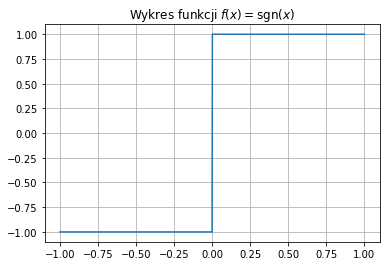

In [91]:
x = np.linspace(-1, 1, 1000)
y_precise = f_7(x)
plt.plot(x,y_precise)
plt.title('Wykres funkcji $f(x) = \mathrm{sgn}(x)$')
plt.grid()
plt.show()

Dla nieparzystych rzędów interpolacji (argumenty funkcji chebyshev_nodes są parzyste przez to, że w wzorze rozważamy również k = 0):

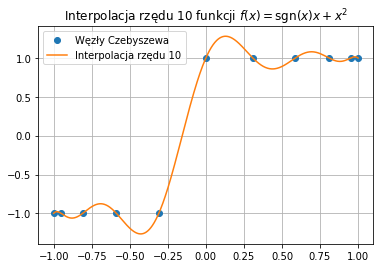

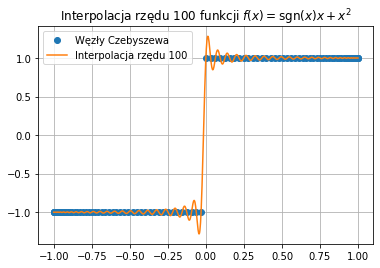

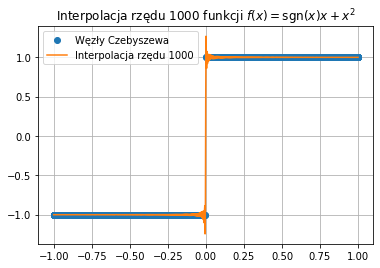

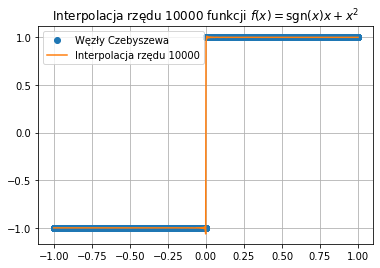

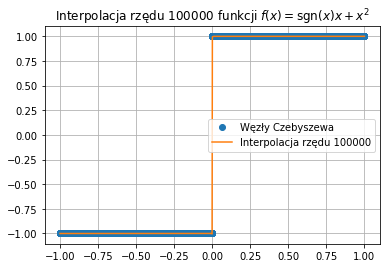

In [105]:
q_inte_np = []
for rg in [10,100,1000,10000,100000]:
    xi = main.chebyshev_nodes(rg)
    yi = f_7(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi, yi, wi, x)
    q_inte_np.append(main.L_inf(y_precise,y))
    plt.plot(xi, yi, 'o')
    plt.plot(x, y)
    plt.title('Interpolacja rzędu {0} funkcji '.format(rg) + '$f(x) = \mathrm{sgn}(x)x+x^2$')
    plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu {0}'.format(rg)])
    plt.grid()
    plt.show()

Dla parzystych rzędów interpolacji (argumenty funkcji chebyshev_nodes są nieparzyste przez to, że w wzorze rozważamy również k = 0):

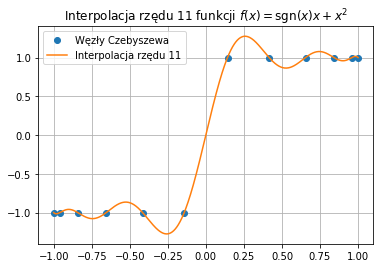

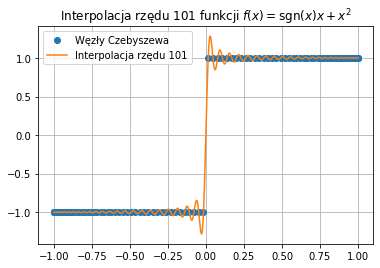

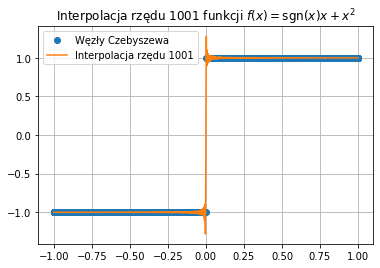

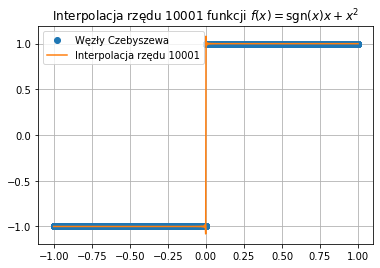

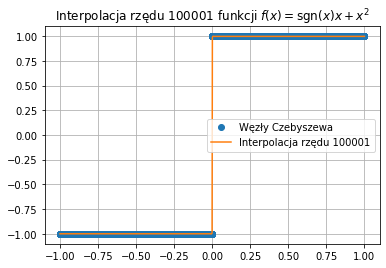

In [106]:
q_inte_pa = []
for rg in [11,101,1001,10001,100001]:
    xi = main.chebyshev_nodes(rg)
    yi = f_7(xi)
    wi = main.bar_czeb_weights(rg)
    y = main.barycentric_inte(xi, yi, wi, x)
    q_inte_pa.append(main.L_inf(y_precise,y))
    plt.plot(xi, yi, 'o')
    plt.plot(x, y)
    plt.title('Interpolacja rzędu {0} funkcji '.format(rg) + '$f(x) = \mathrm{sgn}(x)x+x^2$')
    plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu {0}'.format(rg)])
    plt.grid()
    plt.show()

Normy błędów dla nieparzystego rzędu interpolacji [1.9955397937402313, 1.9541720184862754, 1.4145593829270173, 0.06347935687345552, 0.004237676564706527]
Normy błędów dla parzystego rzędu interpolacji [0.9917946843767546, 0.9249816894627206, 0.3012353332699407, 0.08136330418580817, 0.00907887573846522]


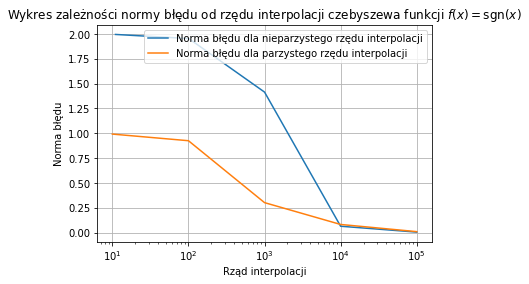

In [122]:
print('Normy błędów dla nieparzystego rzędu interpolacji',q_inte_np)
print('Normy błędów dla parzystego rzędu interpolacji',q_inte_pa)
plt.semilogx([11,101,1001,10001,100001],q_inte_np)
plt.semilogx([10,100,1000,10000,100000],q_inte_pa)
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.title('Wykres zależności normy błędu od rzędu interpolacji czebyszewa funkcji $f(x) = \mathrm{sgn}(x)$')
plt.legend(['Norma błędu dla nieparzystego rzędu interpolacji','Norma błędu dla parzystego rzędu interpolacji'])
plt.grid()
plt.show()

Na podstawie powyższych wykresów można stwierdzić, że w przypadku parzystego rzędu interpolacji jakość przybliżenia jest lepsza niż w przypadku nieparzystego rzędu interpolacji. Zjawisko to występuje z uwagi na pojawienie się dodatkowego węzła w punkcie nieciągłości podczas stosowania nieparzystej liczby węzłów Czebyszewa, który "zaburza" funkcję przybliżającą sprawiając, że nie jest symetryczna. Na ostatnim z przydstawionych wykresów można również zaobserwować efekt Gibbsa powodujący iż norma błędu powinna nie zmniejszać się od pewnego rzędu interpolacji. Niestety z uwagi na ograniczoną liczbę puktów reprezentujących dziedzinę w naszym algorytmie, przy odpowiednio wysokim rzędzie może zdarzyć się, że oscylacje nie będą dla nas widoczne ponieważ znajdą się pomiędzy punktami z dziedziny. Kierując się jednak wskazaniami algorytmu, minimalny błąd dla przybliżenia nieparzystą liczbą węzłów i minimalny błąd przybliżenia parzystą liczbą węzłów to odpowiednio około:

In [120]:
print(q_inte_np[-1])
print(q_inte_pa[-1])

0.004237676564706527
0.00907887573846522


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)